In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #Importing the required libraries

In [2]:
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv') #Reading the given datasets

In [3]:
df = pd.concat([df1,df2],axis=1).reset_index().drop('index',axis=1) #Merging the dataframes into a single dataframe
print(df.shape) #Exploring the shape of final dataframe

(7043, 21)


In [4]:
df=df.drop('customerID',axis=1) #Dropping the column customer id, as it is of no use for training the algorithms.

In [5]:
for i in df.columns:
    print(df[i].value_counts()) #Exploring the unique values from every column

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

In [6]:
df.isna().any() #No NaN values are present

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
oneHotCols = ['gender','MultipleLines','InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
              'StreamingMovies', 'Contract','PaymentMethod',]
replaceStruct = {'Partner':{'Yes':1,'No':0},
                'Dependents':{'Yes':1,'No':0},
                'PhoneService':{'Yes':1,'No':0},
                'PaperlessBilling':{'Yes':1,'No':0},
                'Churn':{'Yes':1,'No':0}}


In [9]:
df=df.replace(replaceStruct) #Replacing the yes-no type valus with numerical values 0 and 1.
df=pd.get_dummies(df, columns=oneHotCols) #Creating dummies for the categorical variables

In [10]:
#There are missing values in TotalCharges column, with the value of '' in string format.
#Therefore, dropping these rows, as only 11 such rows out of 7043 rows exist.
#Also, converting the str datatype into float.
def strfloat(x):
    l1=[str(i) for i in range(10)]
    if(x[0] not in l1):
        x+='0'
        return float(x)
    return float(x)
df['TotalCharges']=df['TotalCharges'].apply(strfloat)


In [11]:
df11=df[df['TotalCharges']!=0.0] #Dropping the rows with 0.0 value
df11.info() #Numerical formats of all of the columns in the final dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   PaperlessBilling                         7032 non-null   int64  
 6   MonthlyCharges                           7032 non-null   float64
 7   TotalCharges                             7032 non-null   float64
 8   Churn                                    7032 non-null   int64  
 9   gender_Female                            7032 non-null   uint8  
 10  gender_Male                              7032 no

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

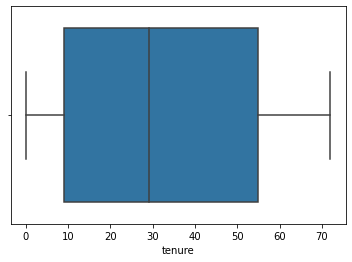

In [12]:
sns.boxplot(df['tenure'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

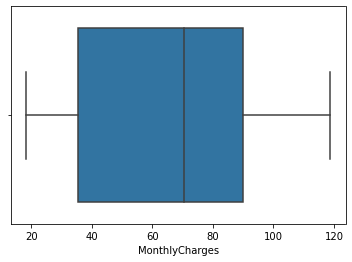

In [13]:
sns.boxplot(df['MonthlyCharges'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

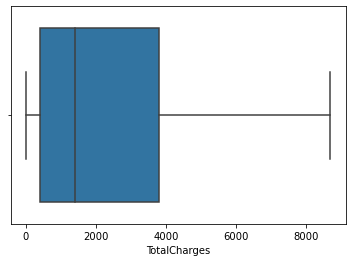

In [14]:
sns.boxplot(df['TotalCharges']) #Thus, we can see that no outliers are present in the continuous data in the given dataset.

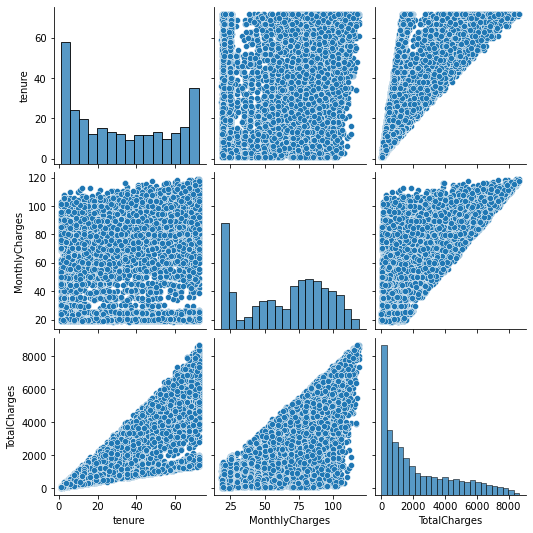

In [15]:
#Let's see how these continuous variables look against each other in pairplots
sns.pairplot(df11[['tenure','MonthlyCharges','TotalCharges']])
#We can see that tenure is strongly related to both the variables Monthlycharges and TotalCharges

In [16]:
'''Highest correlation is present in TotalCharges and tenure.
   Then we can see that there's a relatively weaker correlation between MonthlyCharges and TotalCharges
   Right skewed distribution of TotalCharges'''

"Highest correlation is present in TotalCharges and tenure.\n   Then we can see that there's a relatively weaker correlation between MonthlyCharges and TotalCharges\n   Right skewed distribution of TotalCharges"

In [17]:
X=df11.drop('Churn',axis=1)
y=df11['Churn'] #Separating predictors and target variable

In [19]:
#Let's see how the training and test datasets compare to the main dataset.
train_df = X_train.copy()
train_df['Churn']=y_train
test_df = X_test.copy()
test_df['Churn'] = y_test
print(df11['Churn'].value_counts())
print(train_df['Churn'].value_counts())
print(test_df['Churn'].value_counts())
print('Length of training dataset is ',(len(train_df)/len(df11))*100,'% of the length of original dataset')
print('Length of testing dataset is ',(len(test_df)/len(df11))*100,'% of the length of original dataset')
#Almost accurate 70-30 train-test split can be seen here
print('Percentage of ones in the main dataset is',(len(df11[df11['Churn']==1])/len(df11))*100,'%')
print('Percentage of ones in the training dataset is',(len(train_df[train_df['Churn']==1])/len(train_df))*100,'%')
print('Percentage of ones in the test dataset is',(len(test_df[test_df['Churn']==1])/len(test_df))*100,'%')
#Almost equal distribution of target variable in main dataset, training dataset and test dataset

0    5163
1    1869
Name: Churn, dtype: int64
0    3608
1    1314
Name: Churn, dtype: int64
0    1555
1     555
Name: Churn, dtype: int64
Length of training dataset is  69.99431171786121 % of the length of original dataset
Length of testing dataset is  30.00568828213879 % of the length of original dataset
Percentage of ones in the main dataset is 26.578498293515356 %
Percentage of ones in the training dataset is 26.696464851686308 %
Percentage of ones in the test dataset is 26.303317535545023 %


In [20]:
#Building  simpe decision trees with both Gini impurity and entropy criteria, with no pruning
from sklearn.tree import DecisionTreeClassifier

dTree_gini = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree_gini.fit(X_train, y_train)
dTree_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [21]:
print("Accuracies for the decision tree with Gini impurity criteria:-")
print("Training accuracy: ",dTree_gini.score(X_train,y_train))
print("Testing accuracy: ",dTree_gini.score(X_test,y_test))
print("Accuracies for the decision tree with entropy criteria:-")
print("Training accuracy: ",dTree_entropy.score(X_train,y_train))
print("Testing accuracy: ",dTree_entropy.score(X_test,y_test))
#Overfitting can be seen in both of the decision trees, thus pruning is required.

Accuracies for the decision tree with Gini impurity criteria:-
Training accuracy:  0.9979683055668428
Testing accuracy:  0.7180094786729858
Accuracies for the decision tree with entropy criteria:-
Training accuracy:  0.9979683055668428
Testing accuracy:  0.7175355450236967


In [22]:
#Plotting these decision trees is computationally expensive, thus, commenting out. 
'''from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree_entropy, feature_names = fn, class_names=cn, filled = True)
fig.savefig('treeGini.png')'''

"from sklearn.tree import plot_tree\n\nfn = list(X_train)\ncn = ['No', 'Yes']\nfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)\nplot_tree(dTree_entropy, feature_names = fn, class_names=cn, filled = True)\nfig.savefig('treeGini.png')"

In [23]:
'''fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree_gini, feature_names = fn, class_names=cn, filled = True)
fig.savefig('treeEntropy.png')'''

"fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)\nplot_tree(dTree_gini, feature_names = fn, class_names=cn, filled = True)\nfig.savefig('treeEntropy.png')"

In [24]:
#Let's take a look at the feature importance of these decision trees.
print (pd.DataFrame(dTree_gini.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                              Imp
SeniorCitizen                            0.018807
Partner                                  0.019306
Dependents                               0.019042
tenure                                   0.125681
PhoneService                             0.000000
PaperlessBilling                         0.024014
MonthlyCharges                           0.187736
TotalCharges                             0.200177
gender_Female                            0.010081
gender_Male                              0.011308
MultipleLines_No                         0.012304
MultipleLines_No phone service           0.003233
MultipleLines_Yes                        0.014186
InternetService_DSL                      0.000000
InternetService_Fiber optic              0.045887
InternetService_No                       0.000000
OnlineSecurity_No                        0.014407
OnlineSecurity_No internet service       0.000000
OnlineSecurity_Yes                       0.005190


In [25]:
print (pd.DataFrame(dTree_gini.feature_importances_, columns = ["Imp"], index = X_train.columns)) #Exactly same feature importance for both of the decision trees.

                                              Imp
SeniorCitizen                            0.018807
Partner                                  0.019306
Dependents                               0.019042
tenure                                   0.125681
PhoneService                             0.000000
PaperlessBilling                         0.024014
MonthlyCharges                           0.187736
TotalCharges                             0.200177
gender_Female                            0.010081
gender_Male                              0.011308
MultipleLines_No                         0.012304
MultipleLines_No phone service           0.003233
MultipleLines_Yes                        0.014186
InternetService_DSL                      0.000000
InternetService_Fiber optic              0.045887
InternetService_No                       0.000000
OnlineSecurity_No                        0.014407
OnlineSecurity_No internet service       0.000000
OnlineSecurity_Yes                       0.005190


Confusion Matrix for testing data of the decision tree with Gini impurity as solving method.


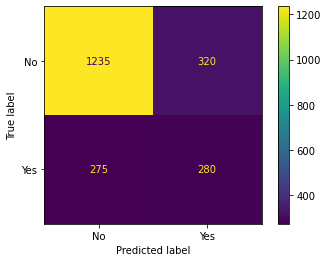

In [26]:
#Let's take a look at the confusion matrices of both of these trees.
from sklearn import metrics

print("Confusion Matrix for testing data of the decision tree with Gini impurity as solving method.")
pred_test_gini = dTree_gini.predict(X_test)
cm=metrics.confusion_matrix(y_test, pred_test_gini)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot()

Confusion Matrix for testing data of the decision tree with entropy as solving method.


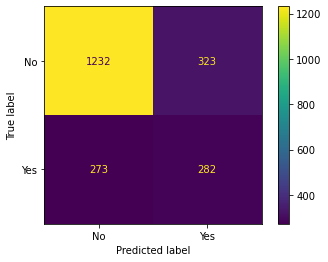

In [27]:
print("Confusion Matrix for testing data of the decision tree with entropy as solving method.")
pred_test_entropy = dTree_entropy.predict(X_test)
cm=metrics.confusion_matrix(y_test, pred_test_entropy)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot()

In [28]:
'''We can see that a slightly higher number of false positives can be seen in the confusion matrix
   of the decision tree with entropy as the solving method than that with Gini impurity as the solving method.'''

'We can see that a slightly higher number of false positives can be seen in the confusion matrix\n   of the decision tree with entropy as the solving method than that with Gini impurity as the solving method.'

In [29]:
#Let's try pruning these trees.
dTree_gini_pruned = DecisionTreeClassifier(criterion = 'gini', random_state=1,max_depth=3)
dTree_entropy_pruned = DecisionTreeClassifier(criterion = 'entropy', random_state=1,max_depth=3)
dTree_gini_pruned.fit(X_train, y_train)
dTree_entropy_pruned.fit(X_train,y_train)
print("Accuracies for the pruned decision tree with Gini impurity criteria:-")
print("Training accuracy: ",dTree_gini_pruned.score(X_train,y_train))
print("Testing accuracy: ",dTree_gini_pruned.score(X_test,y_test))
print("Accuracies for the pruned decision tree with entropy criteria:-")
print("Training accuracy: ",dTree_entropy_pruned.score(X_train,y_train))
print("Testing accuracy: ",dTree_entropy_pruned.score(X_test,y_test))
'''Here, the training accuracy has decreased drastically, but on the other hand,
   testing accuracy has improved due to pruning.'''


Accuracies for the pruned decision tree with Gini impurity criteria:-
Training accuracy:  0.7878911011783828
Testing accuracy:  0.7976303317535545
Accuracies for the pruned decision tree with entropy criteria:-
Training accuracy:  0.7878911011783828
Testing accuracy:  0.7976303317535545


'Here, the training accuracy has decreased drastically, but on the other hand,\n   testing accuracy has improved due to pruning.'

In [30]:
#Let's find out the most optimum pruning depth, in terms of accuracies for all decision trees with varying depths.
train_acc_gini = []
test_acc_gini=[]
train_acc_ent = []
test_acc_ent=[]
for i in range(2,30):
    dTree_gini_pruned = DecisionTreeClassifier(criterion = 'gini', random_state=1,max_depth=i)
    dTree_entropy_pruned = DecisionTreeClassifier(criterion = 'entropy', random_state=1,max_depth=i)
    dTree_gini_pruned.fit(X_train, y_train)
    dTree_entropy_pruned.fit(X_train,y_train)
    train_acc_gini .append(dTree_gini_pruned.score(X_train,y_train))
    test_acc_gini.append(dTree_gini_pruned.score(X_test,y_test))
    train_acc_ent.append(dTree_entropy_pruned.score(X_train,y_train))
    test_acc_ent.append(dTree_entropy_pruned.score(X_test,y_test))


Text(0, 0.5, 'Accuracy')

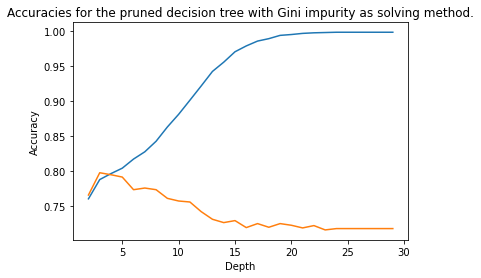

In [31]:
plt.plot(range(2,30),train_acc_gini)
plt.plot(range(2,30),test_acc_gini)
plt.title('Accuracies for the pruned decision tree with Gini impurity as solving method.')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

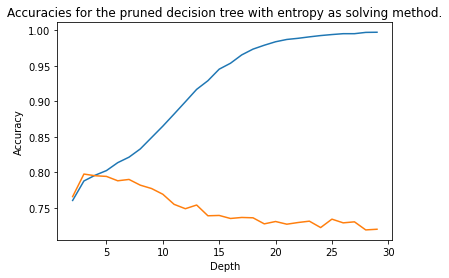

In [32]:
plt.plot(range(2,30),train_acc_ent)
plt.plot(range(2,30),test_acc_ent)
plt.title('Accuracies for the pruned decision tree with entropy as solving method.')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

In [33]:
'''Thus, we can see that at depth of 4 for both of the decision trees, most optimal result can be found out,
   by considering overfitting as the unwanted aspect of deeper decision trees'''

'Thus, we can see that at depth of 4 for both of the decision trees, most optimal result can be found out,\n   by considering overfitting as the unwanted aspect of deeper decision trees'

In [34]:
#Let's try a random bagging algorithm, with a decision tree with gini impurity as solving method, as base estimator

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree_gini, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

In [35]:
bgcl.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=50, random_state=1)

In [36]:
print("Accuracy of basic bagging algorithm on training dataset is ",bgcl.score(X_train,y_train))
print("Accuracy of basic bagging algorithm on test dataset is ",bgcl.score(X_test,y_test))
#We can see a bit of overfitting here, therefore let's try tuning the hyperparameters such as number of estimators, maximum samples and maximum features.

Accuracy of basic bagging algorithm on training dataset is  0.9971556277935798
Accuracy of basic bagging algorithm on test dataset is  0.7734597156398104


In [37]:
'''Here, we'll take a look at hyperparamter tuning for bagging algorithm
   , with decision tree with gini impurity as solving method, as the base estimator.'''
from sklearn.metrics import f1_score
nEstimatorsList = [10,50,100,500,1000]
nMaxSamples = [i/10 for i in range(1,11,1)]
#nMaxFeatures = [i for i in range(1,43)]
df_ev = pd.DataFrame()
m=1
for i in nEstimatorsList:
    for j in nMaxSamples:
        bgcl1 = BaggingClassifier(base_estimator=dTree_gini, n_estimators=i,random_state=1,max_samples=j)
        bgcl1.fit(X_train,y_train)
        train_acc = bgcl1.score(X_train,y_train)
        test_acc = bgcl1.score(X_test,y_test)
        y_p = bgcl1.predict(X_test)
        f1 = f1_score(y_true = y_test,y_pred=y_p)
        df_g = pd.DataFrame({m:{"Estimators":i,"Max_Samples":j,"Train_acc":train_acc,"Test_acc":test_acc,"f1_score":f1}}).transpose()
        df_ev = pd.concat([df_ev,df_g])
        m+=1

In [38]:
print(df_ev.sort_values(by='Test_acc',ascending=False)) #Highest test accuracy with highest f1 score
'''Here, irrespective of high bias in the best possible ensemble algorithm, we can select the ensemble model with
   100 number of estimators and 10% maximum samples, as the most optimum model which can generalize well with testing
   dataset, with comparable levels of accuracies of both training and test datasets.
   Rest of the models give high degrees of variance in their results, thus disregarding these remaining models.'''

    Estimators  Max_Samples  Test_acc  Train_acc  f1_score
21       100.0          0.1  0.803318   0.840715  0.573484
11        50.0          0.1  0.800948   0.837871  0.564315
41      1000.0          0.1  0.800474   0.844372  0.566426
22       100.0          0.2  0.800000   0.872003  0.567623
31       500.0          0.1  0.799526   0.845794  0.567926
32       500.0          0.2  0.797156   0.874644  0.564155
12        50.0          0.2  0.796209   0.871800  0.553942
33       500.0          0.3  0.794787   0.907355  0.565697
43      1000.0          0.3  0.794313   0.906745  0.559838
42      1000.0          0.2  0.794313   0.876067  0.555328
1         10.0          0.1  0.790047   0.815116  0.528222
14        50.0          0.4  0.788626   0.923608  0.543967
44      1000.0          0.4  0.788626   0.932548  0.546748
34       500.0          0.4  0.788152   0.933157  0.548028
24       100.0          0.4  0.787678   0.932954  0.548387
46      1000.0          0.6  0.787678   0.980902  0.5492

'Here, irrespective of high bias in the best possible ensemble algorithm, we can select the ensemble model with\n   100 number of estimators and 10% maximum samples, as the most optimum model which can generalize well with testing\n   dataset, with comparable levels of accuracies of both training and test datasets.\n   Rest of the models give high degrees of variance in their results, thus disregarding these remaining models.'

Training accuracy: 0.8407
Test accuracy: 0.8033
f1-score: 0.5735


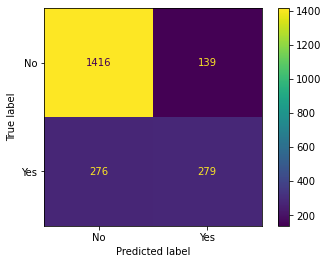

In [39]:
#Printing the results for best bagging classifier.
bgcl1 = BaggingClassifier(base_estimator=dTree_gini, n_estimators=100,random_state=1,max_samples=0.1)
bgcl1.fit(X_train,y_train)
y_test_pred = bgcl1.predict(X_test)
print("Training accuracy:",round(bgcl1.score(X_train,y_train),4))
print("Test accuracy:",round(bgcl1.score(X_test,y_test),4))
print("f1-score:",round(f1_score(y_true = y_test,y_pred=y_test_pred),4))
#Printing the confusion matrix for this model
cm=metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot()

In [40]:
'''We can see a large improvement in terms of true negatives, by comparing this model with simple decision tree models.
   Number of false positives has decreased as well. However, false positives have increased, along with a minute decrease
   in true positives.'''

'We can see a large improvement in terms of true negatives, by comparing this model with simple decision tree models.\n   Number of false positives has decreased as well. However, false positives have increased, along with a minute decrease\n   in true positives.'

In [41]:
#Let's try boosting algorithms. Let's go with a random AdaBoosting first.
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl.fit(X_train,y_train)
print("Training accuracy:",round(abcl.score(X_train,y_train),4))
print("Test accuracy:",round(abcl.score(X_test,y_test),4))
#No overfitting is seen here. Let's try hyperparameter tuning of n_estimators parameter

Training accuracy: 0.7989
Test accuracy: 0.7995


In [42]:
nEstimatorsList = [10,20,30,31,32,33,34,36,38,40,50,100,200]
df_ev1 = pd.DataFrame()
m=1
for i in nEstimatorsList:
    abcl1 = AdaBoostClassifier(n_estimators=i,random_state=1)
    abcl1.fit(X_train,y_train)
    train_acc = abcl1.score(X_train,y_train)
    test_acc = abcl1.score(X_test,y_test)
    y_p = abcl1.predict(X_test)
    f1 = f1_score(y_true = y_test,y_pred=y_p)
    df_g = pd.DataFrame({m:{"Estimators":i,"Train_acc":train_acc,"Test_acc":test_acc,"f1_score":f1}}).transpose()
    df_ev1 = pd.concat([df_ev1,df_g])
    m+=1

In [43]:
print(df_ev1.sort_values(by='Test_acc',ascending=False))
#Selecting the model with 30 number of estimators, as it gives higher test accuracy than any other AdaBoosting model.
#F1 score of this model is marginally lower than the highest possible F1 score, but neglecting this for achieving higher accuracy.

    Estimators  Test_acc  Train_acc  f1_score
3         30.0  0.803791   0.808208  0.589286
2         20.0  0.802844   0.808208  0.586481
4         31.0  0.800000   0.806176  0.580517
1         10.0  0.799526   0.798862  0.599811
5         32.0  0.799052   0.808005  0.578529
13       200.0  0.798578   0.815928  0.575425
12       100.0  0.798104   0.814709  0.579051
6         33.0  0.797156   0.809630  0.581213
7         34.0  0.797156   0.810037  0.581213
8         36.0  0.796209   0.809224  0.577603
10        40.0  0.795735   0.810037  0.571144
9         38.0  0.794313   0.810037  0.571992
11        50.0  0.793839   0.813287  0.571429


Training accuracy: 0.808208
Test accuracy: 0.803791
f1-score: 0.5892857


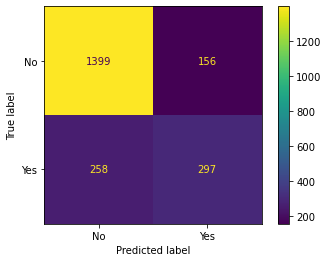

In [44]:
#Printing the results of best possible AdaBoosting model with 30 number of estimators.
abcl1 = AdaBoostClassifier(n_estimators=30, random_state=1)
abcl1.fit(X_train,y_train)
print("Training accuracy:",round(abcl1.score(X_train,y_train),6))
print("Test accuracy:",round(abcl1.score(X_test,y_test),6))
y_test_pred = abcl1.predict(X_test)
print("f1-score:",round(f1_score(y_true = y_test,y_pred=y_test_pred),7))
#Plotting the confusion matrix of this model
cm=metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot() #Higher number of false positives and true negatives, with lower number of other two parameters than the previous bagging model.

In [45]:
#Let's try gradient boosting now. Training a random gradient boosting algorithm first.
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
print("Training accuracy:",round(gbcl.score(X_train,y_train),4))
print("Test accuracy:",round(gbcl.score(X_test,y_test),4))
#Similar results to the previous random training of AdaBoosting algorithm. Let's try the hyperparameter tuning of n_estimators parameter.

Training accuracy: 0.8243
Test accuracy: 0.7995


In [46]:
nEstimatorsList = [10,20,30,31,32,33,34,36,38,40,50,100,200]
df_ev2 = pd.DataFrame()
m=1
for i in nEstimatorsList:
    gbcl1 = GradientBoostingClassifier(n_estimators=i,random_state=1)
    gbcl1.fit(X_train,y_train)
    train_acc = gbcl1.score(X_train,y_train)
    test_acc = gbcl1.score(X_test,y_test)
    y_p = gbcl1.predict(X_test)
    f1 = f1_score(y_true = y_test,y_pred=y_p)
    df_g = pd.DataFrame({m:{"Estimators":i,"Train_acc":train_acc,"Test_acc":test_acc,"f1_score":f1}}).transpose()
    df_ev2 = pd.concat([df_ev2,df_g])
    m+=1

In [47]:
print(df_ev2.sort_values(by='Test_acc',ascending=False))
'''We can see that here as well, for 30 number of estimators, we are getting best possible testing accuracy,
   along with a good F1-score.'''

    Estimators  Test_acc  Train_acc  f1_score
3         30.0  0.802370   0.816335  0.555911
4         31.0  0.802370   0.816741  0.555911
5         32.0  0.802370   0.816944  0.555911
9         38.0  0.801896   0.819789  0.561845
7         34.0  0.801422   0.818367  0.556614
8         36.0  0.801422   0.819992  0.557550
6         33.0  0.800474   0.818570  0.552604
11        50.0  0.799526   0.824258  0.564367
10        40.0  0.799052   0.821617  0.558333
2         20.0  0.797630   0.807192  0.519685
12       100.0  0.795261   0.833198  0.559184
13       200.0  0.790521   0.851280  0.551724
1         10.0  0.789573   0.783218  0.415789


'We can see that here as well, for 30 number of estimators, we are getting best possible testing accuracy,\n   along with a good F1-score.'

Training accuracy: 0.816335
Test accuracy: 0.80237
f1-score: 0.555911


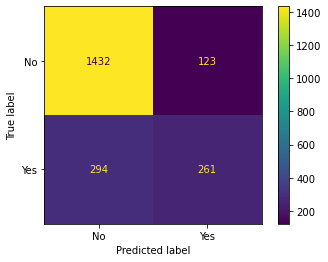

In [48]:
#Printing the results of best possible gradient boosting algorithm., with 30 number of estimators.
gbcl1 = GradientBoostingClassifier(n_estimators=30, random_state=1)
gbcl1.fit(X_train,y_train)
print("Training accuracy:",round(gbcl1.score(X_train,y_train),6))
print("Test accuracy:",round(gbcl1.score(X_test,y_test),6))
y_test_pred = gbcl1.predict(X_test)
print("f1-score:",round(f1_score(y_true = y_test,y_pred=y_test_pred),6))
#Plotting the confusion matrix of this model
cm=metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot() #Higher number of false positives and true negatives, with lower number of other two parameters than the AdaBoosting model
#Overall accuracy and F1 score are slightly lesser than those of AdaBoosting.

In [49]:
#Let's try the random forest classifier now. Training a random algorithm for that.
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)
print("Training accuracy:",round(rfcl.score(X_train,y_train),4))
print("Test accuracy:",round(rfcl.score(X_test,y_test),4))
#Overfitting can be seen here. Trying the hyperparameter tuning of n_estimators and max_features now

Training accuracy: 0.9976
Test accuracy: 0.782


In [50]:
nEstimatorsList = [10,20,30,40,50,100,200]
nMaxFeatures = [i for i in range(5,30)]
df_ev3 = pd.DataFrame()
m=1
for i in nEstimatorsList:
    for j in nMaxFeatures:
        rfcl1 = RandomForestClassifier(n_estimators=i,random_state=1,max_features=j)
        rfcl1.fit(X_train,y_train)
        train_acc = rfcl1.score(X_train,y_train)
        test_acc = rfcl1.score(X_test,y_test)
        y_p = rfcl1.predict(X_test)
        f1 = f1_score(y_true = y_test,y_pred=y_p)
        df_g = pd.DataFrame({m:{"Estimators":i,"Max_features":j,"Train_acc":train_acc,"Test_acc":test_acc,"f1_score":f1}}).transpose()
        df_ev3 = pd.concat([df_ev3,df_g])
        m+=1

In [51]:
df_ev3.sort_values(by='Test_acc',ascending=False) #High degree of overfitting can be seen here, for almost all of the models.
'''For the random forest classifier with 20 estimators and 17 maximum features, the best case scenario gives 78% test accuracy
   and 99% training accuracy, thereby overfitting the training dataset'''
#Therefore, completely neglecting these results, in order to choose the best possible model for the given dataset.

,Estimators,Max_features,Test_acc,Train_acc,f1_score
38,20.0,17.0,0.788152,0.994718,0.531937
129,100.0,8.0,0.787678,0.997968,0.547475
63,30.0,17.0,0.787678,0.996546,0.542857
154,200.0,8.0,0.786256,0.997968,0.545821
52,30.0,6.0,0.786256,0.996140,0.538383
...,...,...,...,...,...
50,20.0,29.0,0.769194,0.993702,0.507583
71,30.0,25.0,0.769194,0.995937,0.503568
5,10.0,9.0,0.768720,0.984559,0.492723
25,10.0,29.0,0.767299,0.983950,0.489074


In [ ]:
#Conclusion:-
'''From all of the algorithms that we've tested above, we can safely say that the AdaBoosting algorithm with 30 estimators
   gives us the best possible outcome. The training and testing accuracies of this model and its F1 score are already calculated
   and printed the cells above these.'''
'''Furthermore, here are several suggestions from my point of view, which can lead to even better results:-
   1. Huge disparity between the number of positive and negative outcomes in the dataset, which has led the algorithm to bias the
      results to a single variable. therefore target balancing is required or an evenly distributed dataset is necessary.
   2. There's a high degree of bias in the results of the best possible algorithm of AdaBoosting, in which both training and
      testing accuracies are around 80%. Even larger dataset can help us deal with this issue, which will result into even higher
      accuracies.
   3. High number of dependent variables are seen, which are dependent upon a single variable of 'InternetService', which thereby
      have very low degree of correlation with the target variable, as we can see in the feture importance dataframe.
      Thus, more number of independent variables are required for such dataset, in order to get even more acuracy.'''